In [1]:
import csv
import hypernetx.algorithms.hypergraph_modularity as hmod
from collections import Counter
import pandas as pd
import numpy as np
from statistics import mean 

import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
def edge_statistics(edges_file):
    with open(edges_file,"r") as f:
        rd = csv.reader(f)
        lines = list(rd)
    Edges = []
    for line in lines:
        Edges.append(set(line))
    sizes = [len(Edges[i]) for i in range(len(Edges))]
    ctr_sizes = Counter(sizes)
    print("EDGE STATISTICS:")
    print("Mean size:",mean(sizes))
    print("Sizes counter:",dict(ctr_sizes))
    df = pd.DataFrame(sizes)
    df.columns = ['size']
    plt.figure(figsize=(9,4))
    sns.countplot(x = "size", data = df)
    plt.show()

def comm_statistics(comm_file):
    with open(comm_file, 'r') as file:
        gt = [int(line) for line in file]
        A_gt = [x for x in hmod.dict2part({str(i+1):gt[i] for i in range(len(gt))}) if len(x)>0]

    print("COMMUNITIES STATISTICS:")
    community_sizes = [len(A_gt[i]) for i in range(len(A_gt))]
    print("Number of communities", len(A_gt))
    print("Mean size:", mean(community_sizes), "min size:", min(community_sizes), "max size:", max(community_sizes) )
    print("Sizes", community_sizes)
    
    
def edges_in_ground_truth_community(edge_file,partitions, show_aggr = 1, show_edge_sizes = 'all', edge_sizes_to_show = {}):
    print("")
    print("EDGES IN A GROUND-TRUTH COMMUNITY")
    with open(comm_file, 'r') as file:
        gt = [int(line) for line in file]
        A_gt = [x for x in hmod.dict2part({str(i+1):gt[i] for i in range(len(gt))}) if len(x)>0]
    with open(edge_file,"r") as f:
        rd = csv.reader(f)
        lines = list(rd)
    Edges = []
    for line in lines:
        Edges.append(set(line))

    edge_comm = []    
    for e in Edges:
        size = len(e)
        biggest = Counter([gt[int(i)-1] for i in e]).most_common(1)[0][1]
        edge_comm.append({'size': size, 'biggest': biggest, 'ratio': biggest/size})


    to_display = {}
    to_display["lambda"] = []
    xs = np.linspace(0.501,1, 500)
    for x in xs:
        to_display["lambda"].append(x)
        
    if show_aggr == 1:
        to_display["aggr"] = []
    edges2show = []
        
    if show_edge_sizes == 'all':
        edges2show = list(set([len(e) for e in Edges]))
    else:
        edges2show = list(edge_sizes_to_show)  
        
    edges2show = sorted(edges2show)
        
        
    for i in edges2show:
        to_display[i] = []

    for x in xs:
        to_display["aggr"].append(sum(list(a["ratio"]>=x for a in edge_comm)))

    for i in edges2show:
        for x in xs:
            to_display[i].append(sum(list(a["ratio"]>=x and a["size"]==i for a in edge_comm)))

    plt.figure(figsize=(9,5))
    plt.ylim(0, to_display["aggr"][0]+50)
    
    plt.title("Number of edges captured by the partition")
    plt.xlabel("Percentage of nodes in the edge")
    plt.ylabel("Number of edges")
    df = pd.DataFrame(to_display)  
    if show_aggr == 1:
        sns.lineplot(data=df, x = "lambda", y = "aggr", label = "all sizes")
    
    for i in edges2show:
        sns.lineplot(data=df, x = "lambda", y = i, label = "size "+str(i))
        
    plt.show()
    return df



    
    
    #return 0
    
def visualise_case(edge_file,comm_file, show_aggr = 1, show_edge_sizes = 'all', edge_sizes_to_show = {}):
    edge_statistics(edge_file)
    comm_statistics(comm_file)
    df = edges_in_ground_truth_community(edge_file,comm_file, show_aggr=show_aggr,
                           show_edge_sizes = show_edge_sizes, edge_sizes_to_show = edge_sizes_to_show)
    return df

ABCDH graph (strict modularity case), edges of sizes 5-8

EDGE STATISTICS:
Mean size: 5.770353733857384
Sizes counter: {6: 517, 5: 886, 7: 279, 8: 99}


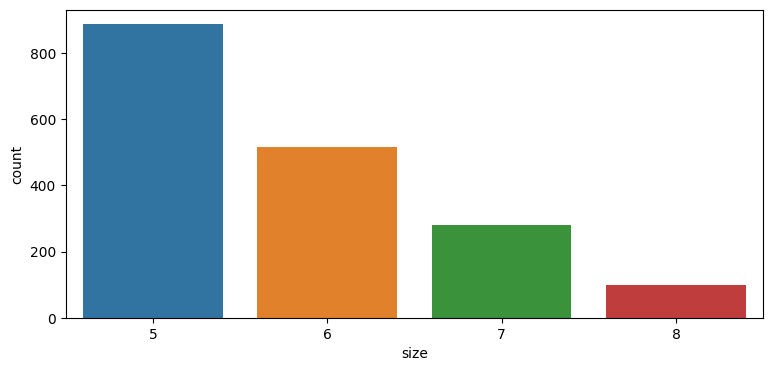

COMMUNITIES STATISTICS:
Number of communities 56
Mean size: 17.857142857142858 min size: 10 max size: 29
Sizes [29, 29, 29, 28, 28, 27, 27, 27, 25, 25, 24, 23, 23, 23, 23, 23, 23, 23, 23, 22, 22, 20, 20, 19, 19, 19, 18, 17, 16, 16, 16, 14, 14, 14, 14, 13, 13, 13, 13, 13, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10]

EDGES IN A GROUND-TRUTH COMMUNITY


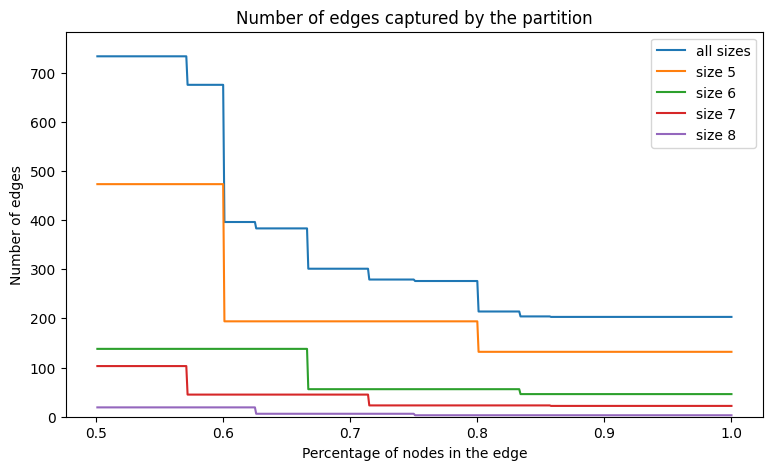

In [3]:
print("ABCDH graph (strict modularity case), edges of sizes 5-8")
print("")
edge_file = "datasets/results_1000_5more_strict_he.txt"
comm_file = "datasets/results_1000_5more_strict_assign.txt"

df = visualise_case(edge_file,comm_file)

ABCDH graph (linear modularity case), edges of sizes 2-11


Linear lot of large edges
EDGE STATISTICS:
Mean size: 4.849096705632306
Sizes counter: {4: 236, 6: 150, 3: 317, 7: 129, 11: 79, 8: 113, 10: 86, 2: 487, 5: 186, 9: 99}


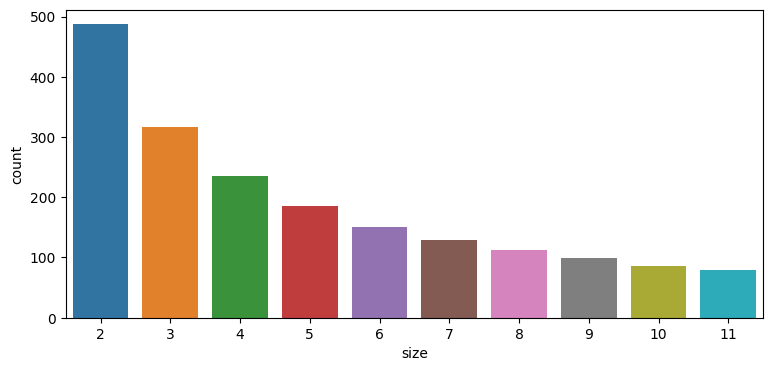

COMMUNITIES STATISTICS:
Number of communities 8
Mean size: 125 min size: 60 max size: 199
Sizes [199, 169, 141, 132, 123, 91, 85, 60]

EDGES IN A GROUND-TRUTH COMMUNITY


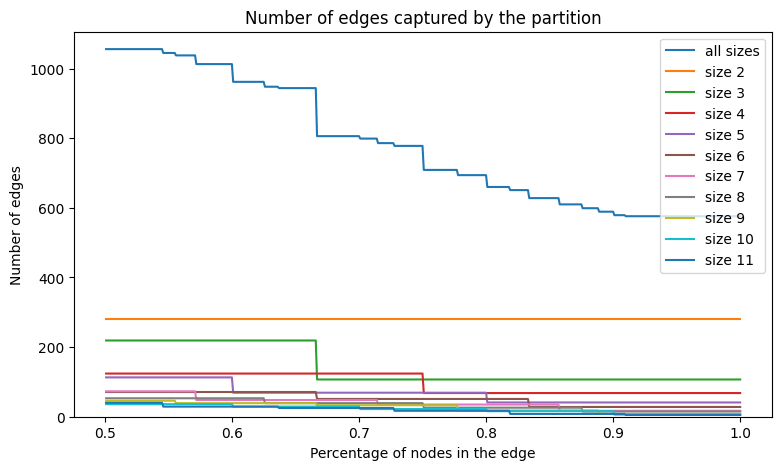

In [4]:
print("ABCDH graph (linear modularity case), edges of sizes 2-11")
print("")

edge_file = "datasets/linear_large_edges_1000_he.txt"
comm_file = "datasets/linear_large_edges_1000_assign.txt"

print("")
print("Linear lot of large edges")
df = visualise_case(edge_file,comm_file)

Senate committees


EDGE STATISTICS:
Mean size: 17.168253968253968
Sizes counter: {18: 34, 29: 5, 21: 29, 19: 26, 22: 26, 17: 15, 20: 23, 14: 12, 16: 11, 12: 3, 7: 3, 5: 25, 9: 1, 4: 12, 25: 3, 6: 13, 10: 10, 28: 5, 23: 14, 15: 12, 11: 2, 24: 12, 27: 2, 8: 2, 31: 2, 26: 8, 30: 4, 13: 1}


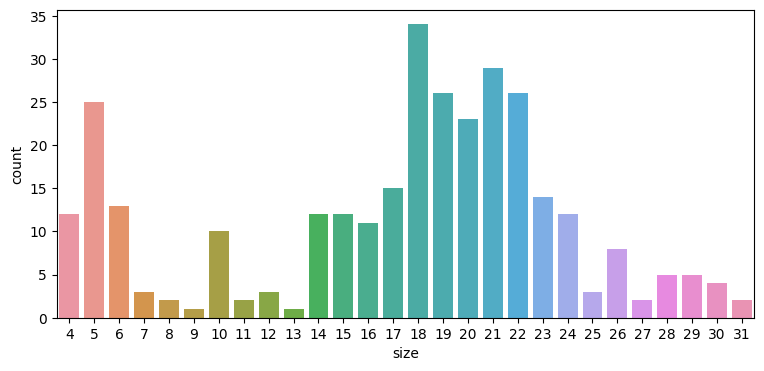

COMMUNITIES STATISTICS:
Number of communities 2
Mean size: 141 min size: 140 max size: 142
Sizes [140, 142]

EDGES IN A GROUND-TRUTH COMMUNITY


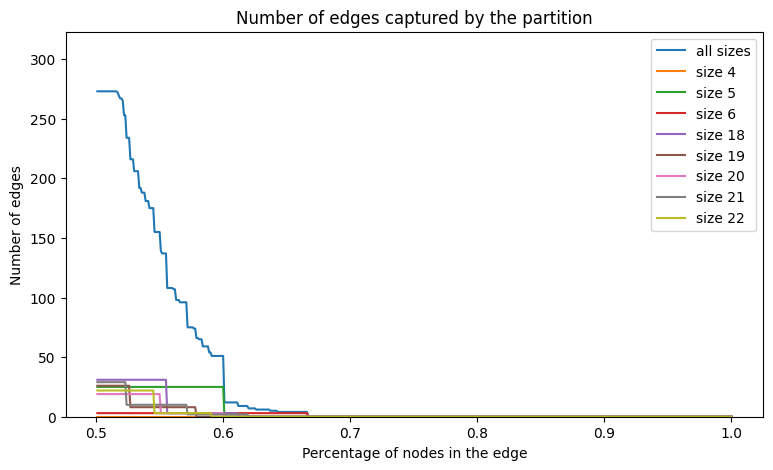

In [5]:
print("Senate committees")
print("")


edge_file = "datasets/hyperedges-senate-committees.txt"
comm_file = "datasets/node-labels-senate-committees.txt"

print("")
df = visualise_case(edge_file,comm_file, show_edge_sizes = "selected", edge_sizes_to_show = {4,5,6,18,19,20,21,22})

House committees


EDGE STATISTICS:
Mean size: 34.73020527859237
Sizes counter: {53: 7, 60: 4, 57: 5, 51: 11, 45: 9, 12: 8, 44: 12, 19: 3, 35: 5, 48: 6, 24: 3, 65: 6, 13: 12, 58: 3, 46: 7, 14: 2, 36: 2, 39: 11, 5: 29, 10: 17, 1: 1, 50: 11, 55: 4, 71: 3, 52: 6, 18: 1, 4: 11, 2: 1, 61: 9, 62: 2, 66: 2, 47: 3, 9: 10, 77: 2, 40: 4, 32: 3, 16: 2, 64: 4, 49: 9, 38: 2, 15: 4, 70: 1, 41: 11, 56: 1, 81: 1, 73: 1, 37: 4, 76: 2, 42: 10, 11: 4, 33: 3, 23: 7, 3: 2, 67: 3, 63: 2, 31: 3, 21: 2, 34: 2, 68: 1, 79: 1, 54: 5, 80: 1, 6: 5, 43: 3, 78: 1, 29: 2, 26: 3, 25: 1, 7: 2, 8: 1}


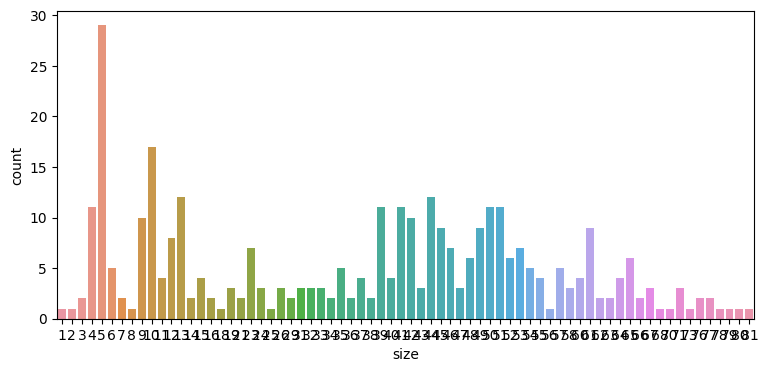

COMMUNITIES STATISTICS:
Number of communities 2
Mean size: 645 min size: 620 max size: 670
Sizes [620, 670]

EDGES IN A GROUND-TRUTH COMMUNITY


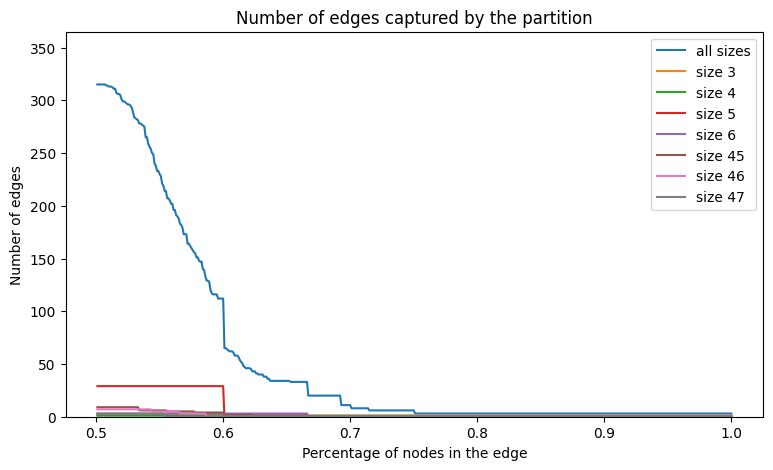

In [6]:
print("House committees")
print("")

edge_file = "datasets/hyperedges-house-committees.txt"
comm_file = "datasets/node-labels-house-committees.txt"

print("")
df = visualise_case(edge_file,comm_file, show_edge_sizes = "selected", edge_sizes_to_show = {3,4,5,6,45,46,47})

Senate bills


EDGE STATISTICS:
Mean size: 7.961964536817916
Sizes counter: {3: 3513, 13: 435, 2: 9838, 7: 1162, 14: 433, 5: 1729, 19: 220, 8: 989, 4: 2600, 9: 902, 39: 48, 11: 640, 29: 91, 18: 256, 6: 1462, 35: 49, 10: 700, 17: 309, 22: 206, 30: 88, 37: 45, 15: 382, 44: 28, 25: 134, 16: 305, 47: 27, 27: 120, 24: 143, 12: 540, 32: 77, 20: 208, 21: 185, 33: 59, 23: 143, 26: 89, 38: 42, 28: 105, 60: 13, 31: 73, 36: 64, 59: 16, 42: 36, 40: 36, 52: 30, 71: 6, 50: 31, 66: 10, 51: 19, 34: 66, 55: 16, 54: 15, 61: 17, 67: 15, 46: 21, 48: 21, 53: 28, 45: 32, 63: 16, 41: 37, 56: 16, 57: 23, 62: 15, 98: 1, 49: 25, 58: 10, 76: 6, 79: 6, 80: 7, 65: 7, 64: 10, 43: 28, 86: 3, 69: 10, 96: 1, 75: 10, 72: 6, 68: 12, 78: 7, 77: 3, 83: 3, 70: 9, 89: 1, 73: 4, 81: 2, 74: 4, 90: 1, 87: 1, 99: 2, 85: 2, 82: 2}


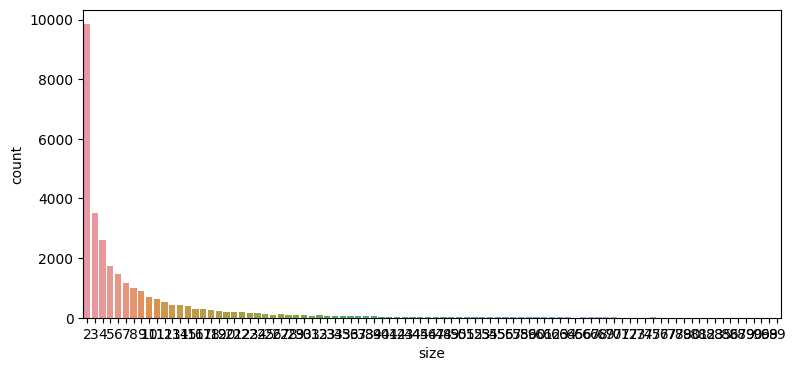

COMMUNITIES STATISTICS:
Number of communities 2
Mean size: 147 min size: 144 max size: 150
Sizes [150, 144]

EDGES IN A GROUND-TRUTH COMMUNITY


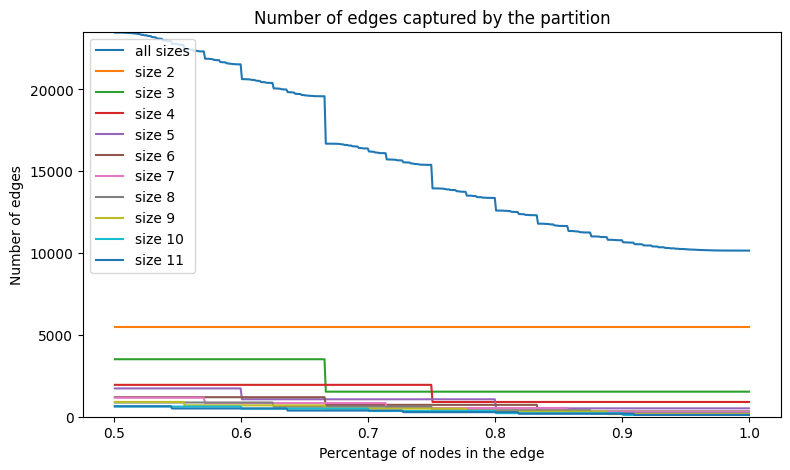

In [7]:
print("Senate bills")
print("")

edge_file = "datasets/hyperedges-senate-bills.txt"
comm_file = "datasets/node-labels-senate-bills.txt"

print("")
df = visualise_case(edge_file,comm_file, show_edge_sizes = "selected", edge_sizes_to_show = {2,3,4,5,6,7,8,9,10,11})

House bills


EDGE STATISTICS:
Mean size: 20.474297801170742
Sizes counter: {2: 11453, 25: 1725, 12: 1324, 4: 3735, 20: 883, 24: 1090, 5: 2769, 14: 1281, 11: 1449, 16: 1061, 7: 2074, 3: 4873, 9: 1695, 10: 1568, 6: 2318, 21: 836, 22: 809, 18: 972, 8: 1852, 23: 813, 15: 1195, 13: 1234, 17: 972, 19: 956, 26: 447, 34: 292, 27: 437, 31: 358, 154: 14, 82: 58, 39: 219, 50: 171, 40: 211, 41: 209, 42: 200, 30: 331, 53: 140, 84: 57, 57: 118, 36: 262, 116: 31, 33: 298, 45: 176, 43: 190, 83: 45, 32: 336, 65: 80, 109: 30, 178: 13, 51: 177, 47: 183, 28: 344, 55: 123, 101: 31, 115: 22, 48: 144, 38: 238, 77: 49, 162: 15, 166: 15, 46: 164, 86: 53, 90: 36, 75: 79, 158: 11, 215: 5, 35: 279, 177: 4, 71: 53, 29: 349, 148: 8, 230: 11, 253: 3, 150: 16, 56: 121, 124: 21, 146: 16, 37: 244, 69: 73, 194: 4, 44: 194, 89: 34, 137: 23, 66: 94, 110: 32, 72: 76, 54: 126, 98: 32, 94: 40, 64: 96, 63: 84, 81: 43, 58: 100, 80: 53, 49: 160, 61: 84, 52: 157, 262: 5, 105: 30, 130: 28, 59: 105, 76: 69, 93: 45, 92: 41, 104: 3

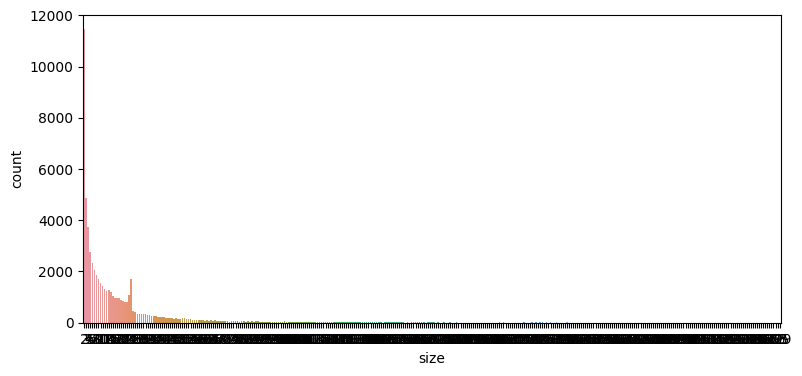

COMMUNITIES STATISTICS:
Number of communities 2
Mean size: 747 min size: 702 max size: 792
Sizes [792, 702]

EDGES IN A GROUND-TRUTH COMMUNITY


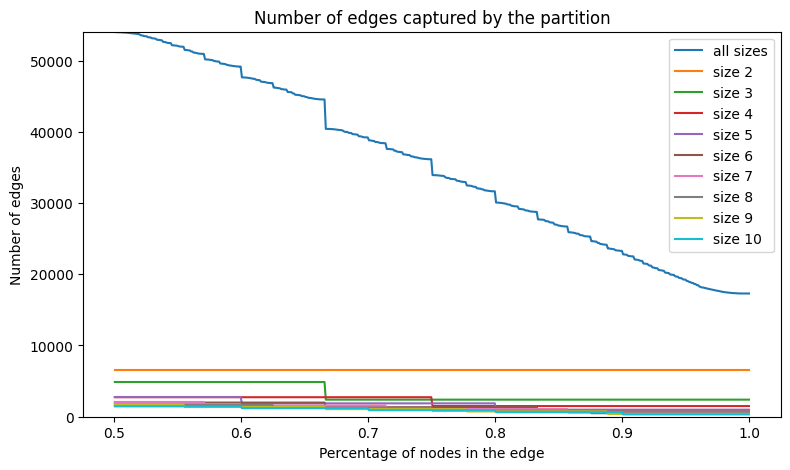

In [8]:
print("House bills")
print("")

edge_file = "datasets/hyperedges-house-bills.txt"
comm_file = "datasets/node-labels-house-bills.txt"

print("")
df = visualise_case(edge_file,comm_file, show_edge_sizes = "selected", edge_sizes_to_show = {2,3,4,5,6,7,8,9,10})

Contact high school


EDGE STATISTICS:
Mean size: 2.3269378357636223
Sizes counter: {3: 2091, 4: 222, 2: 5498, 5: 7}


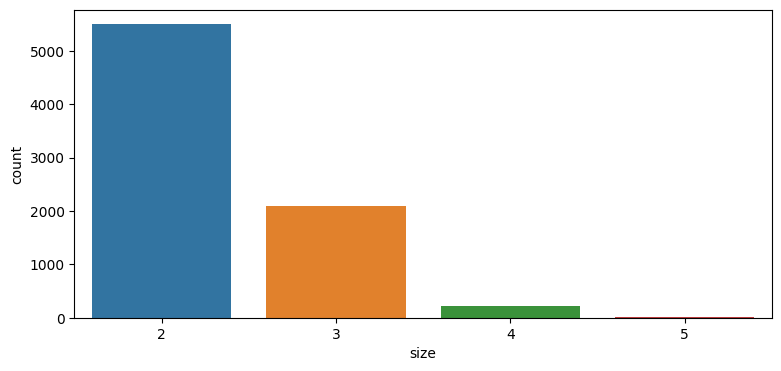

COMMUNITIES STATISTICS:
Number of communities 9
Mean size: 36.333333333333336 min size: 29 max size: 44
Sizes [36, 34, 40, 29, 38, 34, 44, 39, 33]

EDGES IN A GROUND-TRUTH COMMUNITY


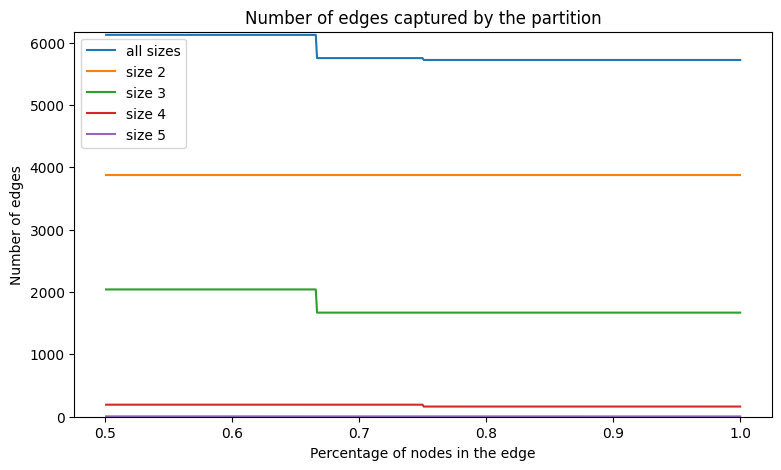

In [9]:
print("Contact high school")
print("")

edge_file = "datasets/hyperedges-contact-high-school.txt"
comm_file = "datasets/node-labels-contact-high-school.txt"

print("")
df = visualise_case(edge_file,comm_file)

Contact primary school


EDGE STATISTICS:
Mean size: 2.4188444584382873
Sizes counter: {2: 7748, 3: 4600, 4: 347, 5: 9}


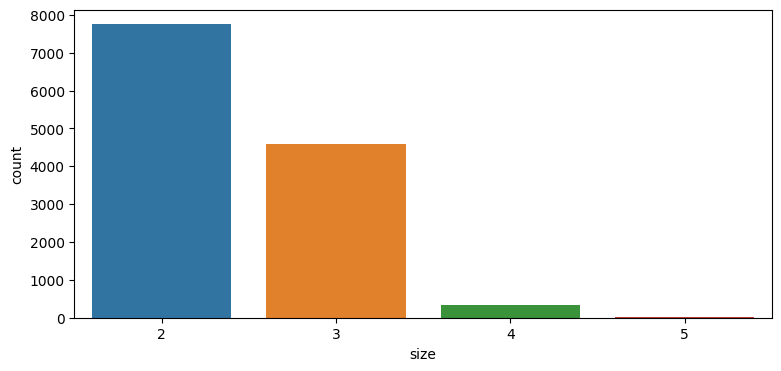

COMMUNITIES STATISTICS:
Number of communities 11
Mean size: 22 min size: 10 max size: 26
Sizes [24, 22, 21, 10, 22, 23, 23, 25, 26, 23, 23]

EDGES IN A GROUND-TRUTH COMMUNITY


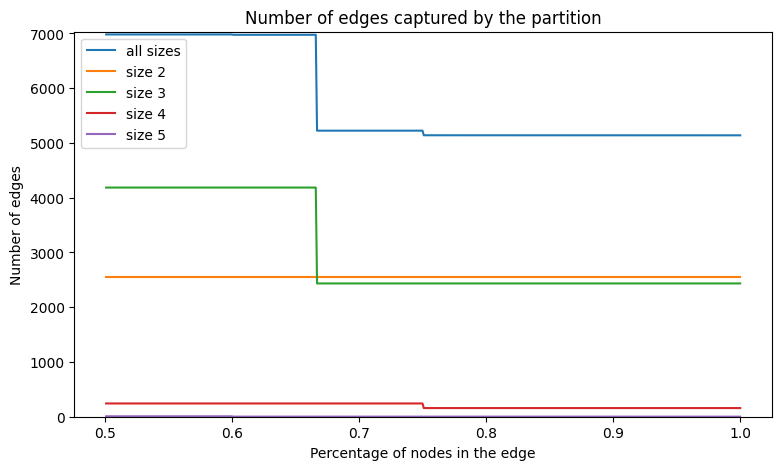

In [10]:
print("Contact primary school")
print("")

edge_file = "datasets/hyperedges-contact-primary-school.txt"
comm_file = "datasets/node-labels-contact-primary-school.txt"

print("")
df = visualise_case(edge_file,comm_file)

Trivago


EDGE STATISTICS:
Mean size: 3.1168729256181336
Sizes counter: {2: 128075, 4: 23325, 5: 11871, 3: 50279, 7: 4152, 10: 1131, 6: 6756, 14: 286, 9: 1665, 8: 2642, 15: 222, 13: 467, 11: 785, 12: 565, 47: 1, 19: 90, 18: 109, 21: 67, 16: 161, 17: 134, 23: 41, 22: 49, 27: 24, 37: 5, 25: 28, 36: 8, 20: 85, 24: 32, 26: 22, 31: 17, 43: 2, 52: 2, 28: 17, 38: 3, 42: 3, 32: 9, 81: 1, 46: 2, 30: 14, 29: 13, 48: 1, 51: 2, 35: 12, 41: 2, 55: 2, 58: 1, 85: 1, 50: 1, 34: 3, 33: 5, 44: 2, 49: 2, 82: 1, 40: 4, 39: 1, 59: 1, 67: 1}


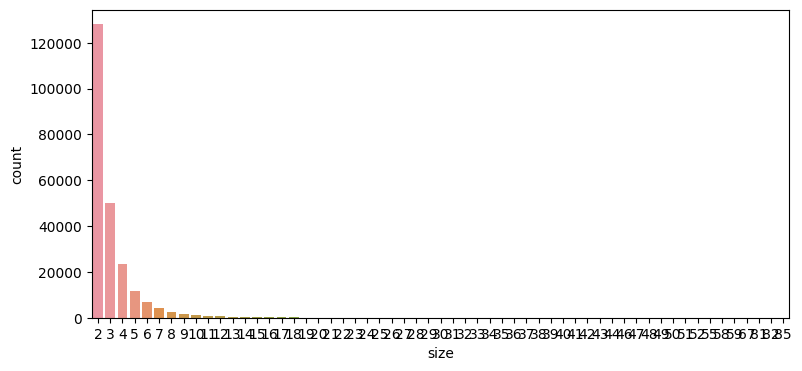

COMMUNITIES STATISTICS:
Number of communities 160
Mean size: 1079.6125 min size: 1 max size: 15519
Sizes [9963, 51, 5380, 1293, 15519, 5618, 975, 8654, 1669, 8430, 1083, 776, 2025, 9699, 3716, 1588, 14921, 2028, 3741, 801, 431, 945, 8269, 2503, 3258, 10065, 6186, 5749, 961, 2798, 3403, 1926, 2783, 1029, 2281, 118, 863, 494, 695, 772, 889, 293, 202, 144, 1183, 200, 1855, 2110, 729, 21, 153, 832, 295, 292, 150, 389, 536, 531, 157, 984, 110, 340, 63, 45, 110, 199, 137, 264, 75, 22, 266, 158, 196, 17, 193, 2, 487, 55, 40, 756, 375, 134, 213, 51, 348, 38, 107, 10, 66, 23, 70, 416, 566, 29, 8, 112, 44, 100, 44, 10, 61, 63, 22, 2, 74, 49, 28, 55, 2, 34, 19, 68, 17, 13, 31, 20, 27, 72, 8, 12, 63, 26, 23, 30, 9, 38, 5, 3, 21, 11, 6, 23, 6, 10, 14, 22, 9, 1, 5, 7, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]

EDGES IN A GROUND-TRUTH COMMUNITY


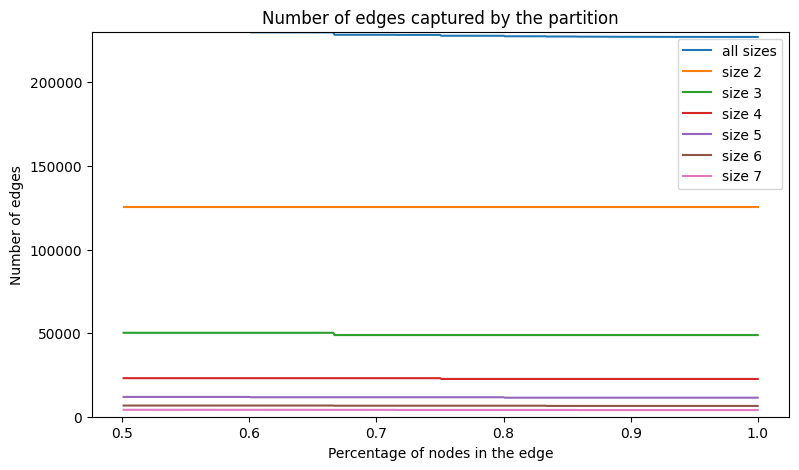

In [11]:
print("Trivago")
print("")

edge_file = "datasets/hyperedges-trivago-clicks.txt"
comm_file = "datasets/node-labels-trivago-clicks.txt"

print("")
df = visualise_case(edge_file,comm_file, show_edge_sizes = "selected", edge_sizes_to_show = {2,3,4,5,6,7})

Walmart


EDGE STATISTICS:
Mean size: 6.589277029153434
Sizes counter: {15: 1145, 10: 2170, 3: 10320, 23: 425, 9: 2574, 6: 4528, 5: 5798, 2: 16508, 12: 1688, 4: 7686, 14: 1260, 19: 667, 18: 754, 7: 3642, 16: 1013, 8: 3082, 13: 1517, 21: 571, 25: 265, 11: 1862, 20: 659, 17: 864, 22: 521, 24: 387}


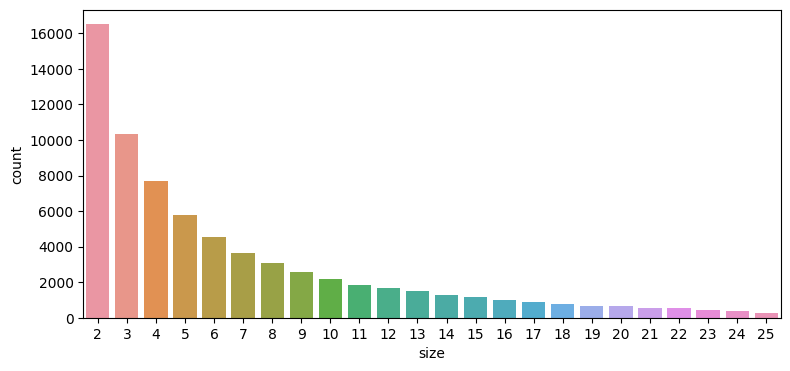

COMMUNITIES STATISTICS:
Number of communities 11
Mean size: 8078.181818181818 min size: 1590 max size: 26178
Sizes [22302, 3080, 6381, 1650, 4391, 2902, 26178, 12441, 1590, 3736, 4209]

EDGES IN A GROUND-TRUTH COMMUNITY


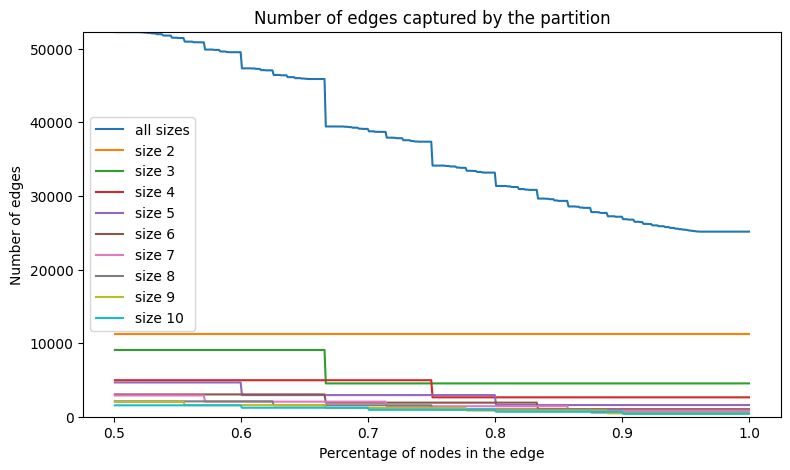

In [12]:
print("Walmart")
print("")

edge_file = "datasets/hyperedges-walmart-trips.txt"
comm_file = "datasets/node-labels-walmart-trips.txt"

print("")
df = visualise_case(edge_file,comm_file, show_edge_sizes = "selected", edge_sizes_to_show = {2,3,4,5,6,7,8,9,10})